In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit-learn as sklearn

SyntaxError: invalid syntax (<ipython-input-110-d46af0eb9c5e>, line 5)

### EDA exploratory section

In [ ]:
df = pd.read_csv("1.04. Real-life example.csv")

In [ ]:
df.describe(include = "all")

C:\Users\mishaun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mishaun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


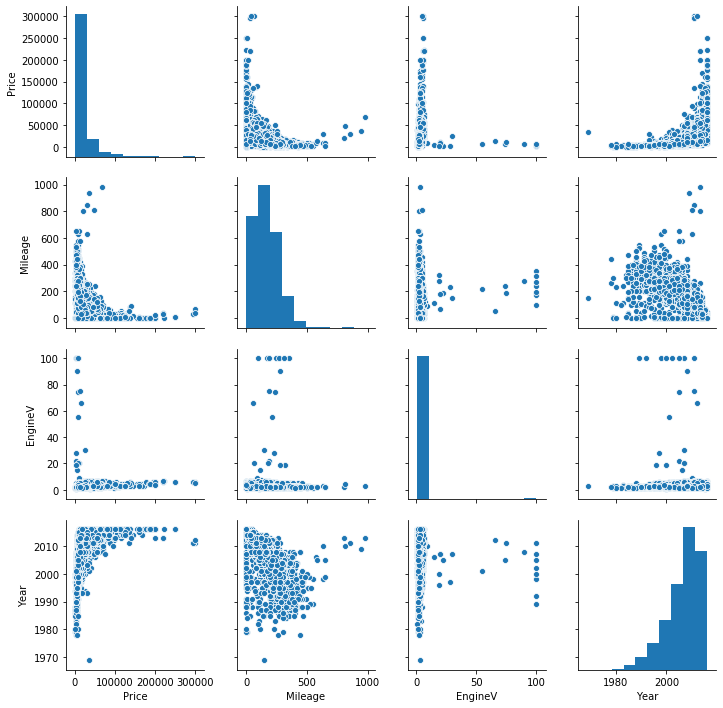

In [111]:
sns.pairplot(df)

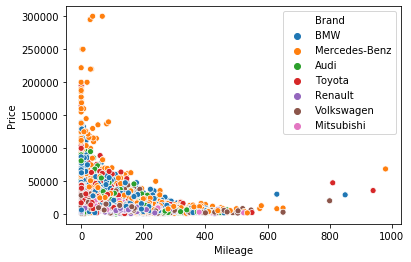

In [112]:
sns.scatterplot(df.Mileage, df.Price, hue = df.Brand)

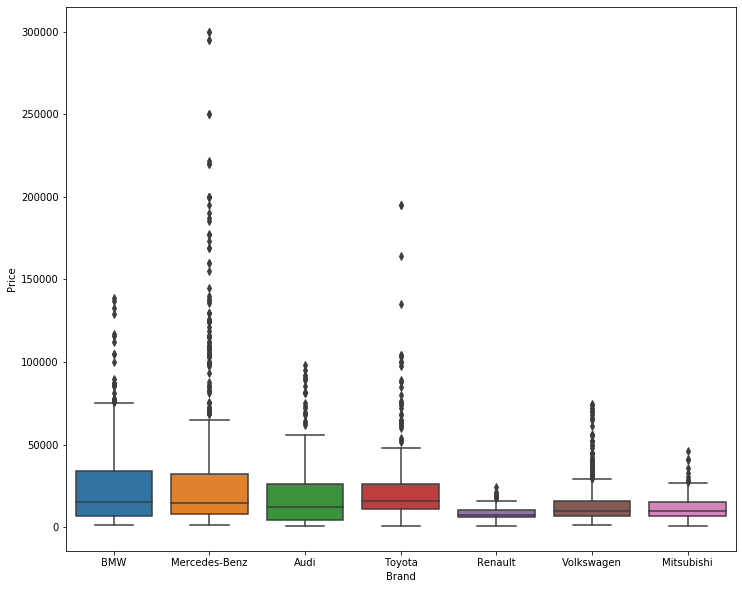

In [113]:
plt.figure(figsize = (12,10))
sns.boxplot(df.Brand, df.Price)

In [114]:
df.Body.value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [115]:
df[df["Body"]=="other"]["EngineV"].nunique()

38

In [116]:
df.Brand.nunique()

7

In [117]:
df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


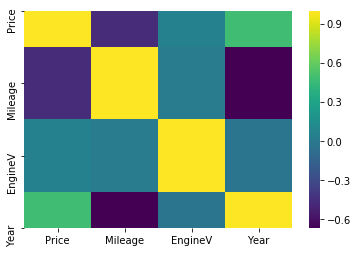

In [118]:
df.corr()
sns.heatmap(df.corr(), cmap= "viridis")

### Data Cleaning Section

In [119]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [120]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [121]:
#since values of null are small, ie., less than 5% of dataset - we can drop them
df_dropnan = df.dropna(axis=0)

In [122]:
df_dropnan.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


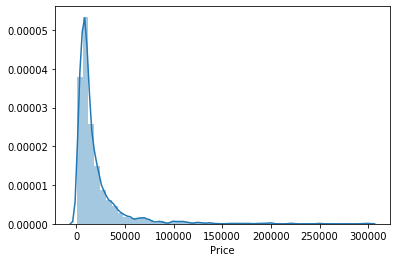

In [123]:
#we see that price has outliers sicne 75% of the data has car prices 22,000 or less
sns.distplot(df_dropnan["Price"])

In [124]:
#lets take only values in the top 99% quartile to drop outliers

q = df_dropnan["Price"].quantile(.99)
#q is the value where the price is equal to the 99% quantile
q

129812.51999999981

In [125]:
df_dropnan = df[df.Price < q]


In [126]:
df_dropnan.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4132,4132.00000,4132,4132.000000,3984.000000,4132,4132,4132.000000,4132
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,908,NaN,1598,NaN,NaN,1895,3738,NaN,193
mean,NaN,17763.66577,NaN,165.582527,2.743770,NaN,NaN,2006.283640,NaN
std,NaN,18939.71448,NaN,104.232463,4.956057,NaN,NaN,6.664444,NaN
min,NaN,600.00000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6900.00000,NaN,93.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11300.00000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.00000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [127]:
#since there are too many unique car models
df_dropnan.drop("Model", axis = 1, inplace = True)



C:\Users\mishaun\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [128]:
#since engine volumes have strange values, we will only keep rows wehre it is under 6.5 Liters

df_dropnan = df_dropnan[df.EngineV < 6.5]

C:\Users\mishaun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


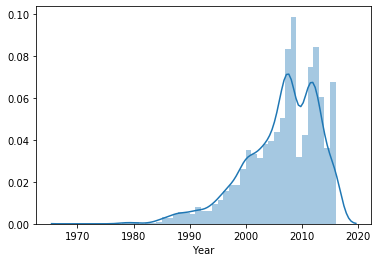

In [129]:
sns.distplot(df_dropnan.Year)

In [130]:
x = df_dropnan.Year.quantile(.01)
x

1987.0

In [131]:
#we also see that year data values have long tails in the 1% quartile, therefore, we will take all the values greater than the 1% quantile

df_dropnan = df_dropnan[df_dropnan.Year > df_dropnan.Year.quantile(.01)]

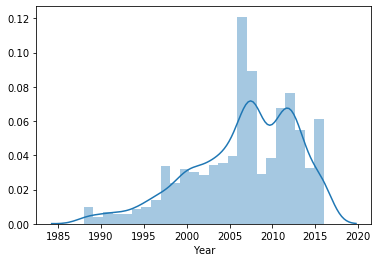

In [132]:
sns.distplot(df_dropnan.Year)

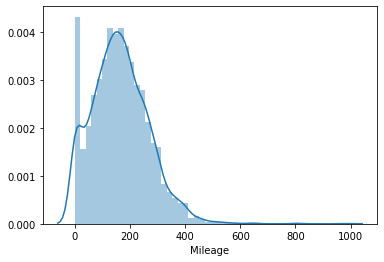

In [133]:
sns.distplot(df_dropnan.Mileage)

In [134]:
#we also see skewness in mileage, so we will take values less than 99% quantile
df_dropnan = df_dropnan[df_dropnan.Mileage < df_dropnan.Mileage.quantile(.99)]

In [135]:
df_cleaned = df_dropnan.reset_index(drop = True)

In [136]:
df_cleaned.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3865,3865.000000,3865,3865.000000,3865.000000,3865,3865,3865.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,847,NaN,1466,NaN,NaN,1806,3504,NaN
mean,NaN,18201.438580,NaN,160.401035,2.450259,NaN,NaN,2006.716171
std,NaN,19088.279971,NaN,95.455403,0.949535,NaN,NaN,6.099113
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [137]:
#kept values
df_cleaned["Price"].count()/df["Price"].count()

0.9261921878744309

### Checking assumptions for linear models

In [138]:
#since the scatter plots showed price looking like an exponential distribution - we will do a log transform
#this will allow us to assume linearity
df_cleaned["LogPrice"] = np.log(df_cleaned.Price)

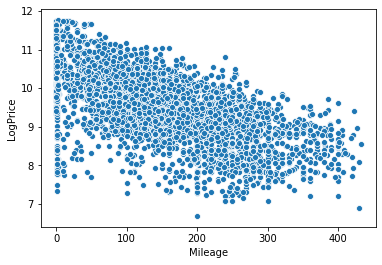

In [139]:
sns.scatterplot(df_cleaned.Mileage, df_cleaned.LogPrice)

In [140]:
df_cleaned.corr()

,Price,Mileage,EngineV,Year,LogPrice
Price,1.000000,-0.554301,0.393238,0.570721,0.856256
Mileage,-0.554301,1.000000,0.005174,-0.714654,-0.614612
EngineV,0.393238,0.005174,1.000000,-0.019775,0.412266
Year,0.570721,-0.714654,-0.019775,1.000000,0.746786
LogPrice,0.856256,-0.614612,0.412266,0.746786,1.000000


In [141]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = df_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [142]:
vif

,VIF,Features
0,3.797050,Mileage
1,10.361600,Year
2,7.658673,EngineV


In [143]:
#since we see colinearity between mileage and year, we will drop year
df_cleaned.drop("Year", axis = 1, inplace = True)

In [144]:
df_cleaned.drop("Price", axis = 1, inplace = True)


In [145]:
df_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,LogPrice
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3860,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3861,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3862,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3863,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Preprocessing Data and creating dummy vars for categorical features

In [146]:
#drop first makes sure we don't create multicolinearity with the dummy vars
data_wDummies = pd.get_dummies(df_cleaned, drop_first = True )

In [147]:
data_wDummies

,Mileage,EngineV,LogPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3861,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3862,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3863,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Running The Model

In [148]:
target = data_wDummies["LogPrice"]
features = data_wDummies.drop("LogPrice", axis = 1)

In [149]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(features)
scaled_features = scale.transform(features)

In [150]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(scaled_features, target, train_size = .8, random_state=365)

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
reg = LinearRegression()

In [153]:
reg.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
reg.intercept_

9.415543146447767

In [155]:
reg.coef_

array([-0.45698263,  0.20456409,  0.02294135,  0.01879091, -0.13557283,
       -0.17949878, -0.05544707, -0.0876325 , -0.1515749 , -0.10353041,
       -0.19104531, -0.12346252, -0.16833612, -0.12979763, -0.03105611,
       -0.15384487,  0.32082719])

In [156]:
import statsmodels.api as sm

In [157]:
x = sm.add_constant(xTrain)

In [158]:
statsmod = sm.OLS(yTrain, x).fit()

In [159]:
statsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     531.7
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:49:32   Log-Likelihood:                -1841.6
No. Observations:                3092   AIC:                             3719.
Df Residuals:                    3074   BIC:                             3828.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4155      0.008   1188.677      0.000       9.400       9.431
x1            -0.4570      0.009    -51.152      0.000      -0.474      -0.439
x2             0.2046      0.010     20.894      0.000       0.185       0.224
x3             0.0229      0.012      1.969      0.049    9.28e-05       0.046
x4             0.0188      0.012      1.507      0.132      -0.006       0.043
x5            -0.1356      0.010    -12.922      0.000      -0.156      -0.115
x6            -0.1795      0.012    -15.546      0.000      -0.202      -0.157
x7            -0.0554      0.012     -4.811      0.000      -0.078      -0.033
x8            -0.0876      0.013     -6.742      0.000      -0.113      -0.062
x9            -0.1516      0.010    -15.220      0.000      -0.171      -0.132
x10           -0.1035      0.010    -10.755      0.000      -0.122      -0.085
x11           -0.1910      0.012    -15.882      0.000      -0.215      -0.167
x12           -0.1235      0.011    -11.691      0.000      -0.144      -0.103
x13           -0.1683      0.012    -14.030      0.000      -0.192      -0.145
x14           -0.1298      0.010    -13.592      0.000      -0.149      -0.111
x15           -0.0311      0.008     -3.897      0.000      -0.047      -0.015
x16           -0.1538      0.010    -15.322      0.000      -0.174      -0.134
x17            0.3208      0.009     36.851      0.000       0.304       0.338
==============================================================================
Omnibus:                      702.784   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2859.588
Skew:                          -1.060   Prob(JB):                         0.00
Kurtosis:                       7.208   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
xTrain.shape

(3092, 17)

In [161]:
data_wDummies.count()

Mileage                3865
EngineV                3865
LogPrice               3865
Brand_BMW              3865
Brand_Mercedes-Benz    3865
Brand_Mitsubishi       3865
Brand_Renault          3865
Brand_Toyota           3865
Brand_Volkswagen       3865
Body_hatch             3865
Body_other             3865
Body_sedan             3865
Body_vagon             3865
Body_van               3865
Engine Type_Gas        3865
Engine Type_Other      3865
Engine Type_Petrol     3865
Registration_yes       3865
dtype: int64

In [162]:
features.columns

Index(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [163]:
yhat = reg.predict(xTrain)

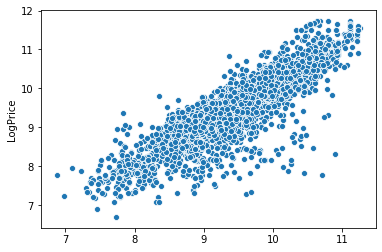

In [164]:
sns.scatterplot(yhat, yTrain)

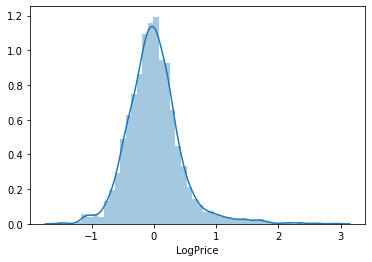

In [165]:
#distribtuion of residual errors but follow standard normal distribution of linear regression

sns.distplot(yhat - yTrain)

In [166]:
#we see a longer tail on the right, which means that our model is sometimes predicting a higher price than actual

In [167]:
reg.score(xTrain, yTrain)

0.7462354287441848

In [168]:
#creating summary table like statsmodels for sklearn model

summary = pd.DataFrame(features.columns.values, columns = ["Features"])
summary["Weights"] = reg.coef_

In [169]:
summary

,Features,Weights
0,Mileage,-0.456983
1,EngineV,0.204564
2,Brand_BMW,0.022941
3,Brand_Mercedes-Benz,0.018791
4,Brand_Mitsubishi,-0.135573
5,Brand_Renault,-0.179499
6,Brand_Toyota,-0.055447
7,Brand_Volkswagen,-0.087633
8,Body_hatch,-0.151575
9,Body_other,-0.103530


In [171]:
yPredict = reg.predict(xTest)

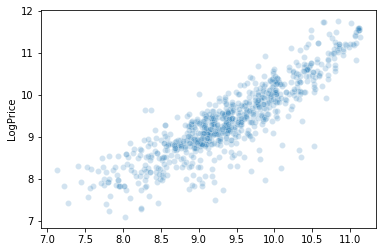

In [176]:
sns.scatterplot(yPredict, yTest, alpha = 0.2)

In [177]:
df_test = pd.DataFrame(np.exp(yPredict), columns = ["Predictions"])

In [192]:
#have to reset the index after we dropped values to sync up with predicted values ()
df_test["Actual Price"] = np.exp(yTest.reset_index(drop = True))
df_test["Residuals"] = df_test["Actual Price"] - df_test["Predictions"]
df_test["% Error"] = abs(df_test["Residuals"]/df_test["Actual Price"])*100

In [193]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_test

,Predictions,Actual Price,Residuals,% Error
0,66819.56,104999.00,38179.44,36.36
1,5217.99,10900.00,5682.01,52.13
2,48722.50,59900.00,11177.50,18.66
3,7598.75,2500.00,-5098.75,203.95
4,5074.44,3500.00,-1574.44,44.98
...,...,...,...,...
768,29607.69,29500.00,-107.69,0.37
769,32667.55,39500.00,6832.45,17.30
770,3801.92,5900.00,2098.08,35.56
771,27502.97,68500.00,40997.03,59.85


In [194]:
df_test.describe()

,Predictions,Actual Price,Residuals,% Error
count,773.00,773.00,773.00,773.00
mean,16327.93,18494.69,2166.76,36.58
std,13591.73,20530.31,10583.21,57.13
min,1243.07,1200.00,-30482.44,0.02
25%,7460.24,6800.00,-1975.46,11.82
50%,11728.43,11500.00,291.03,22.43
75%,20757.66,21000.00,3437.88,39.42
max,68150.19,129222.00,83647.94,568.90
